In [1]:
import corner
import numpy as np

In [6]:
chaindir = '/home/isidro/SimpleMC/chains/'

In [7]:
chainname = 'nled_phy_SN+RiessH0_mh_2004_1.txt'

In [8]:
#npchain = np.asanyarray(np.loadtxt(chaindir+chainname))
outputname = chaindir+chainname
npchain = np.loadtxt(outputname)

In [9]:
np.shape(npchain)

(1805, 10)

In [10]:
chain = npchain[:,2:5]
np.shape(chain)

(1805, 3)

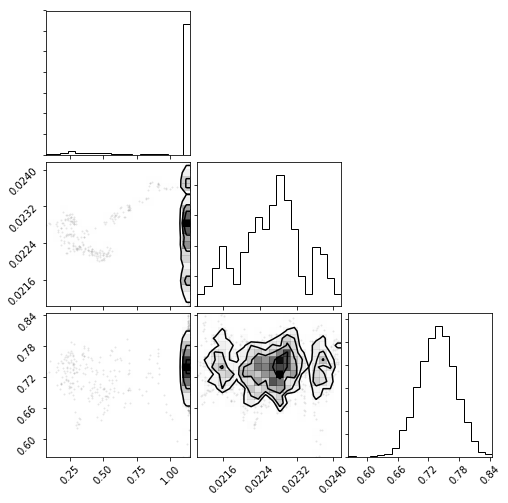

In [11]:
figure = corner.corner(chain)

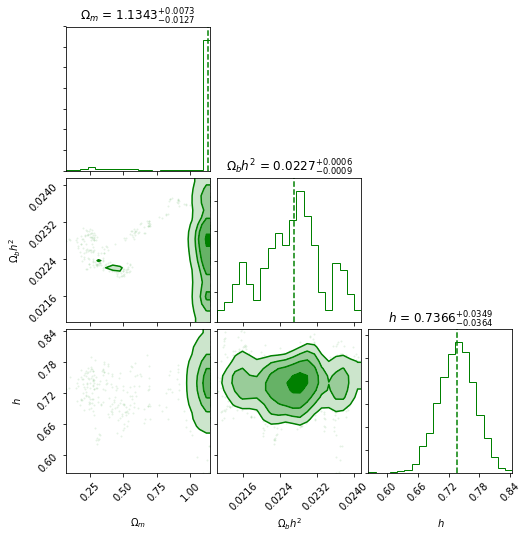

In [14]:
figure = corner.corner(chain, labels=["$\Omega_m$", "$\Omega_bh^2$", "$h$"],
                       bins = 20,
                       weights = None,
                       color='g',
                       quantiles=[0.5],
                       show_titles=True, 
                       title_fmt = '.4f',
                       smooth=True, 
                       fill_contours = True,
                       title_kwargs={"fontsize": 12})
#figure.savefig("corner.png")

In [15]:

print outputname
parfile = outputname.rstrip(".txt")
print parfile
parfile = parfile.rstrip("_1")+".paramnames"
print parfile
labelfile = open(parfile,'r')
type(labelfile)

/home/isidro/SimpleMC/chains/nled_phy_SN+RiessH0_mh_2004_1.txt
/home/isidro/SimpleMC/chains/nled_phy_SN+RiessH0_mh_2004_1
/home/isidro/SimpleMC/chains/nled_phy_SN+RiessH0_mh_2004.paramnames


file

In [16]:
labels = []
for item in labelfile: 
    print item
    labels.append('r$'+item.split('			')[1].strip('\n')+'$')

Om			\Omega_m

Obh2			\Omega_{b}h^2

h			h

b0			b_0

hh0			h_0param

BetouleSN_like 			BetouleSN

Hubble_0.738_pm_0.024_like 			Hubble_0.738_pm_0.024

theory_prior 			 None 



In [17]:
for i in labels: print i

r$\Omega_m$
r$\Omega_{b}h^2$
r$h$
r$b_0$
r$h_0param$
r$BetouleSN$
r$Hubble_0.738_pm_0.024$
r$ None $


In [18]:
labels[:4]

['r$\\Omega_m$', 'r$\\Omega_{b}h^2$', 'r$h$', 'r$b_0$']

In [21]:
import seaborn as sns
import pandas as pd

In [28]:
data1 = pd.read_csv(chaindir+'nled_phy_SN+RiessH0_mh_2004_1.txt', sep=' ', header=None)

In [29]:
data1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,2.409330e-43,197.650,0.312432,0.022302,0.627805,0.000315,0.000369,-186.921,-10.54070,-0.188071,NaN
1,7.472870e-43,195.386,0.326865,0.022313,0.638658,0.000340,0.000361,-186.616,-8.56666,-0.203120,NaN
2,1.181730e-43,199.075,0.301381,0.022266,0.621531,0.000354,0.000400,-187.157,-11.77510,-0.142969,NaN
3,4.758640e-43,197.100,0.305090,0.022301,0.631822,0.000379,0.000415,-187.127,-9.78632,-0.186713,NaN
4,3.950150e-43,195.275,0.318390,0.022342,0.640903,0.000453,0.000414,-186.845,-8.18385,-0.245511,NaN


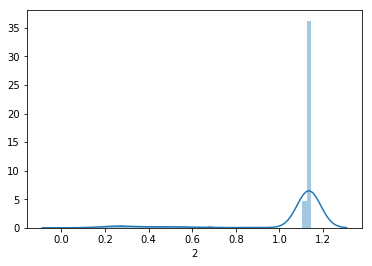

In [57]:
plt = sns.distplot(data1[2])

#plt.set_xlim(0.9,1.3)

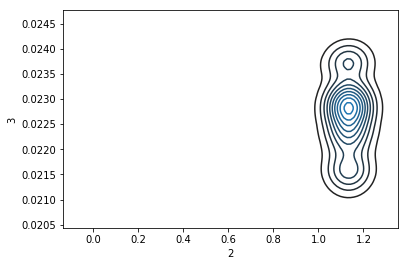

In [59]:
sns.kdeplot(data1[2],data1[3])

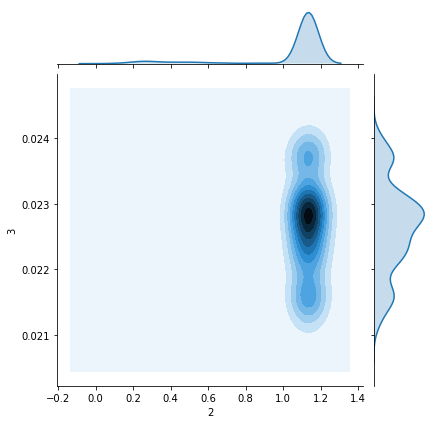

In [64]:
sns.jointplot(data1[2],data1[3], kind="kde")

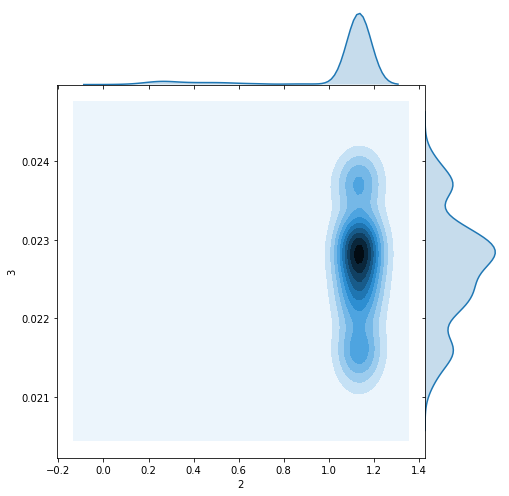

In [62]:
sns.jointplot(data1[2], data1[3], kind="kde", height=7, space=0)

(0, 10)

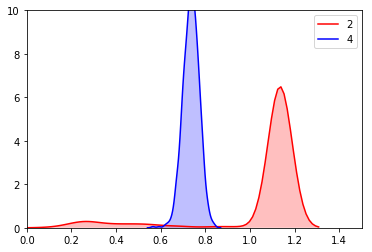

In [78]:
p1=sns.kdeplot(data1[2], shade=True, color="r")
p1=sns.kdeplot(data1[4], shade=True, color="b")
p1.set_xlim(0,1.5)
p1.set_ylim(0,10)

In [147]:
chainowa = "/home/isidro/SimpleMC/chains/owaChains/"
chainbambi = pd.read_csv(chainowa+"owaCDM_BBAO+SN+RiessH0_bambi_0.5.txt", header=None,sep=" ")
chainsbambi = pd.read_csv(chainowa+"owaCDM_BBAO+SN+RiessH0_sbambi_0.5.txt", header=None,sep=" ")
chainmnest = pd.read_csv(chainowa+"owaCDM_BBAO+SN+RiessH0_mnest_0.5.txt",header= None,sep=" ")
chainsnest = pd.read_csv(chainowa+"owaCDM_BBAO+SN+RiessH0_snest_0.5.txt", header=None,sep=" ")
chainmh = pd.read_csv(chainowa+"owaCDM_phy_BBAO+SN+RiessH0_mh_2000_1.txt", header=None,sep=" ")

In [148]:
chainbambi.head()

,0,1,2,3,4,5,6,7
0,5.661640e-107,273.802909,0.149942,0.023362,0.902686,-1.108964,0.111110,0.054660
1,2.067745e-106,272.500912,0.569308,0.023394,0.969607,-1.085811,-0.152037,0.062182
2,1.132063e-105,270.794077,0.650155,0.020888,0.895765,-0.686571,0.361566,-0.000326
3,3.161234e-105,269.760490,1.351513,0.020911,0.723974,-0.862620,0.359293,0.071748
4,5.360641e-105,269.225702,0.709419,0.022533,0.912501,-0.834271,0.102478,-0.015112


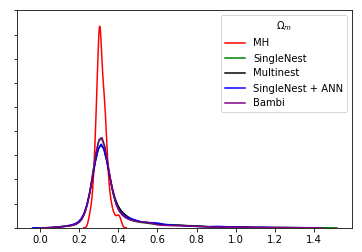

In [154]:
import matplotlib.pyplot as plt
p2=sns.kdeplot(chainmh[2], shade=False, color="r")
p2=sns.kdeplot(chainmnest[2], shade=False, color="g")
p2=sns.kdeplot(chainsnest[2], shade=False, color="k")
p2=sns.kdeplot(chainsbambi[2], shade=False, color="b")
p2=sns.kdeplot(chainbambi[2], shade=False, color="purple")

plt.yticks(p2.get_yticks(), " ")

p2.legend(title='$\Omega_m$', loc='upper right', labels=['MH','SingleNest','Multinest','SingleNest + ANN','Bambi'])

plt.savefig(chainowa+"OmegaM.png",dpi=200)
#p2.set_xlim(0,1.5)
#p2.set_ylim(0,10)

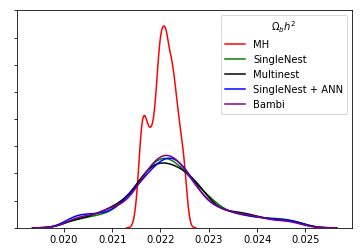

In [155]:
p2=sns.kdeplot(chainmh[3], shade=False, color="r")
p2=sns.kdeplot(chainmnest[3], shade=False, color="g")
p2=sns.kdeplot(chainsnest[3], shade=False, color="k")
p2=sns.kdeplot(chainsbambi[3], shade=False, color="b")
p2=sns.kdeplot(chainbambi[3], shade=False, color="purple")

plt.yticks(p2.get_yticks(), " ")

p2.legend(title='$\Omega_bh^2$', loc='upper right', labels=['MH','SingleNest','Multinest','SingleNest + ANN','Bambi'])
plt.savefig(chainowa+"Omegabh2.png",dpi=200)

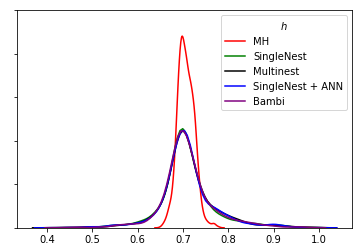

In [157]:
p2=sns.kdeplot(chainmh[4], shade=False, color="r")
p2=sns.kdeplot(chainmnest[4], shade=False, color="g")
p2=sns.kdeplot(chainsnest[4], shade=False, color="k")
p2=sns.kdeplot(chainsbambi[4], shade=False, color="b")
p2=sns.kdeplot(chainbambi[4], shade=False, color="purple")

plt.yticks(p2.get_yticks(), " ")

p2.legend(title='$h$', loc='upper right', labels=['MH','SingleNest','Multinest','SingleNest + ANN','Bambi'])
plt.savefig(chainowa+"h.png",dpi=200)

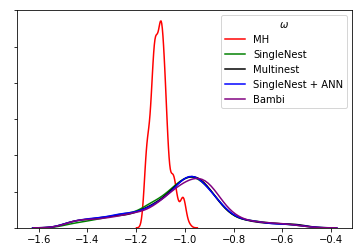

In [158]:
p2=sns.kdeplot(chainmh[5], shade=False, color="r")
p2=sns.kdeplot(chainmnest[5], shade=False, color="g")
p2=sns.kdeplot(chainsnest[5], shade=False, color="k")
p2=sns.kdeplot(chainsbambi[5], shade=False, color="b")
p2=sns.kdeplot(chainbambi[5], shade=False, color="purple")

plt.yticks(p2.get_yticks(), " ")

p2.legend(title='$\omega$', loc='upper right', labels=['MH','SingleNest','Multinest','SingleNest + ANN','Bambi'])
plt.savefig(chainowa+"omega.png",dpi=200)

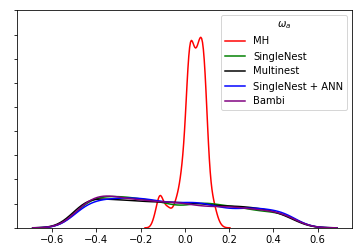

In [159]:
p2=sns.kdeplot(chainmh[6], shade=False, color="r")
p2=sns.kdeplot(chainmnest[6], shade=False, color="g")
p2=sns.kdeplot(chainsnest[6], shade=False, color="k")
p2=sns.kdeplot(chainsbambi[6], shade=False, color="b")
p2=sns.kdeplot(chainbambi[6], shade=False, color="purple")

plt.yticks(p2.get_yticks(), " ")

p2.legend(title='$\omega_a$', loc='upper right', labels=['MH','SingleNest','Multinest','SingleNest + ANN','Bambi'])
plt.savefig(chainowa+"wa.png",dpi=200)

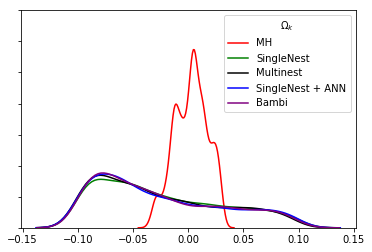

In [160]:
p2=sns.kdeplot(chainmh[7], shade=False, color="r")
p2=sns.kdeplot(chainmnest[7], shade=False, color="g")
p2=sns.kdeplot(chainsnest[7], shade=False, color="k")
p2=sns.kdeplot(chainsbambi[7], shade=False, color="b")
p2=sns.kdeplot(chainbambi[7], shade=False, color="purple")

plt.yticks(p2.get_yticks(), " ")

p2.legend(title='$\Omega_k$', loc='upper right', labels=['MH','SingleNest','Multinest','SingleNest + ANN','Bambi'])
plt.savefig(chainowa+"OmegaK.png",dpi=200)